In [1]:
import pandas as pd
import numpy as np
import sklearn.datasets
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering as ag
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
warnings.filterwarnings('ignore')

In [2]:
iris=load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df['spices']=iris.target
x=iris.data
y=iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),spices
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
names=iris.target_names
print(names[0])
print(names[1])
print(names[2])

setosa
versicolor
virginica


In [4]:
iris=load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df['spices']=iris.target
df.drop('spices',axis=1,inplace=True)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


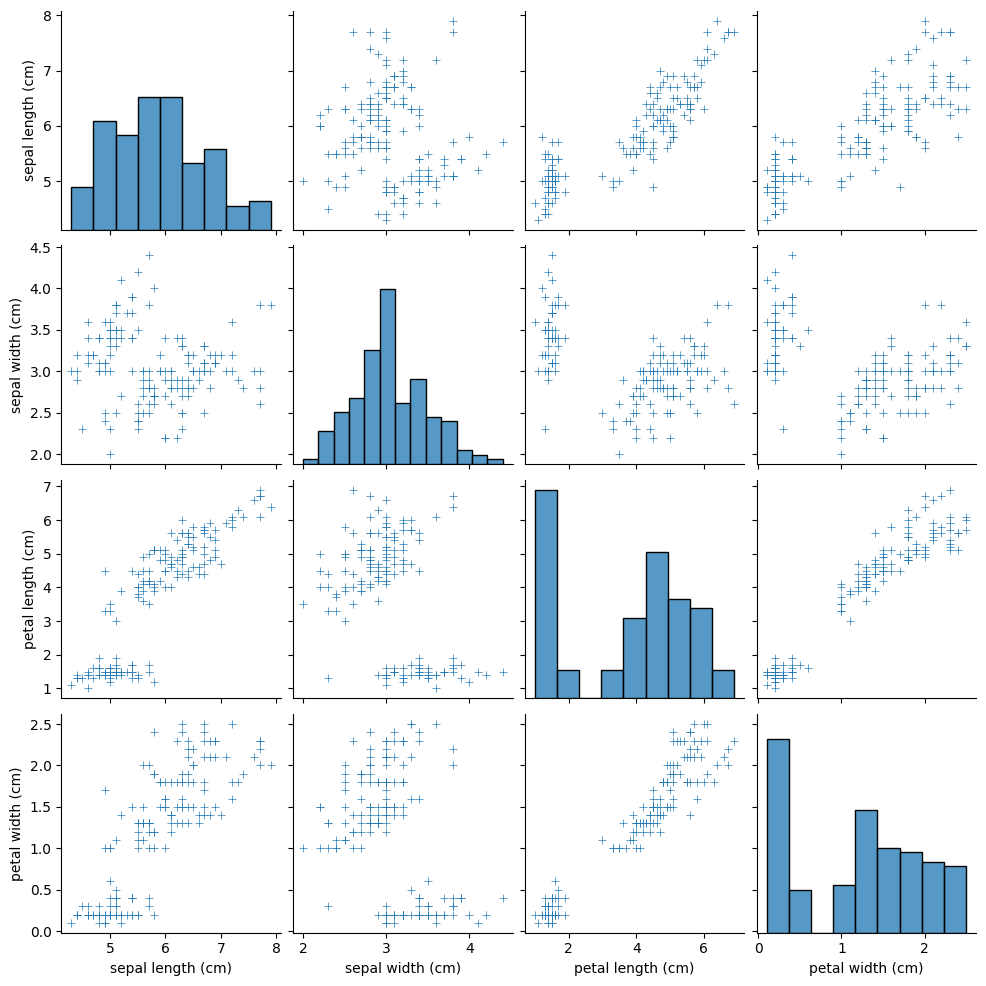

In [7]:
sns.pairplot(df,markers='+')

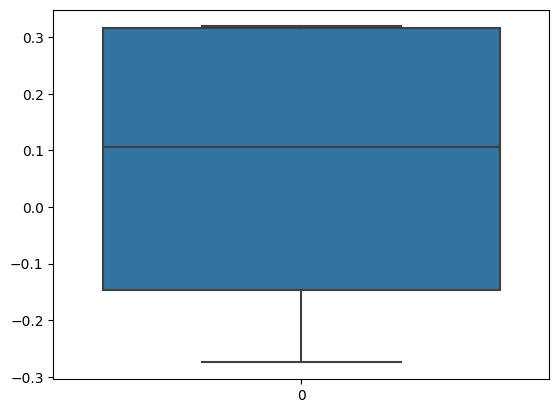

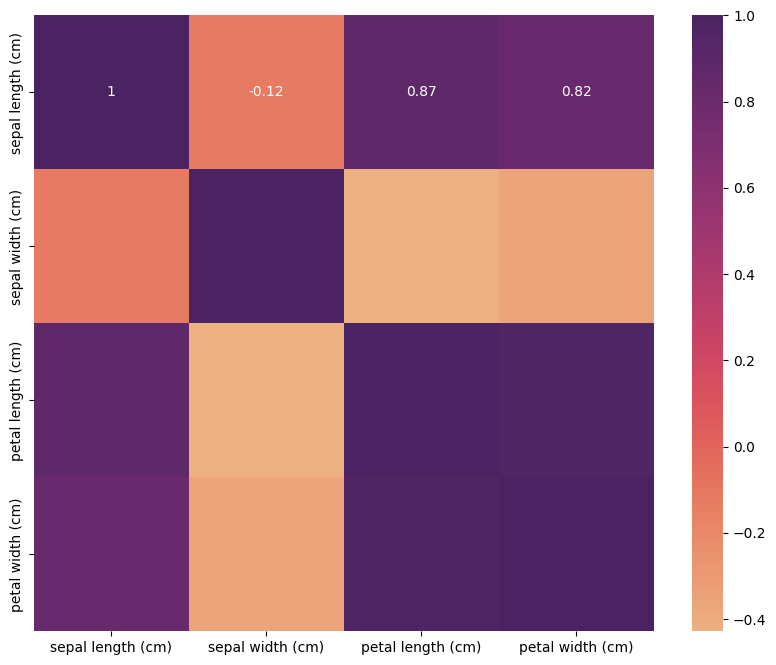

In [8]:
out=df.skew()
sns.boxplot(out)
corre=df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corre,annot=True,cmap='flare')
corre
plt.show()

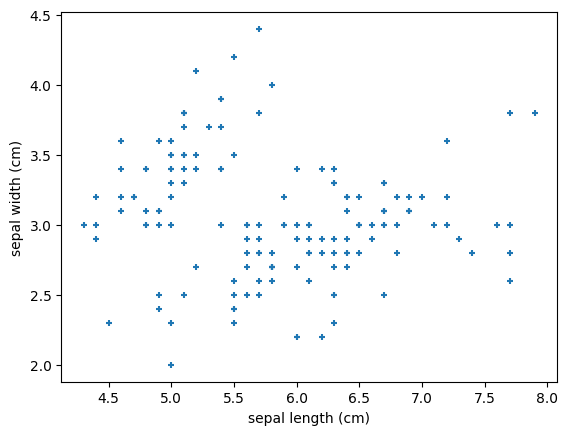

In [9]:
df.plot(kind='scatter',x="sepal length (cm)",y="sepal width (cm)",marker='+')
plt.show()

## Applying elbow method

In this code, the **Elbow method** is being implemented to help determine the optimal number of clusters for the K-Means algorithm.

### Explanation:

1. **WSS (Within-Cluster Sum of Squares)**: This refers to the sum of squared distances between each data point and the centroid of its assigned cluster. The lower the WSS, the more tightly grouped the data points are within their clusters.

2. **Loop (1 to 10 clusters)**: The loop iterates from 1 to 10, fitting the K-Means algorithm to the data for different numbers of clusters (from 1 cluster to 9 clusters).

3. **KMeans Model**: For each iteration, a K-Means model is created with `i` clusters and trained on the data (`df`).

4. **Inertia (WSS value)**: The WSS (inertia) value for each model is calculated and stored in the `wss` list. The inertia represents how internally cohesive the clusters are.

5. **Plot**: After collecting WSS values, a plot is created showing the number of clusters on the x-axis and the WSS (inertia) on the y-axis.

### Elbow Method:
The "Elbow" method helps identify the optimal number of clusters by looking for a point where the WSS stops decreasing significantly (forming an elbow shape). This is the point where adding more clusters does not result in a significant reduction in WSS, indicating the best trade-off between model complexity and accuracy.



Text(0, 0.5, 'Squared Distance')

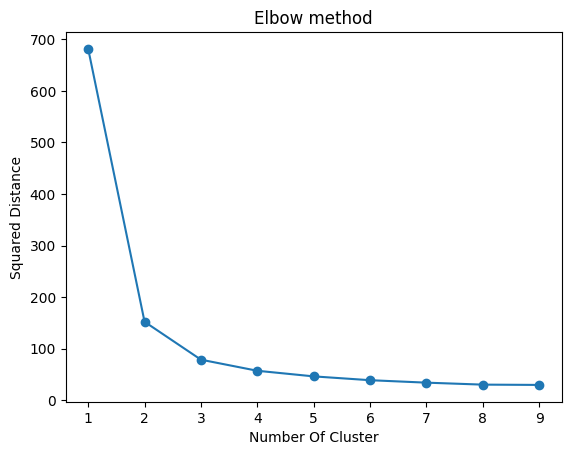

In [10]:
wss=[]
for i in range (1,10):
    kmean=KMeans(n_clusters=i,random_state=42)
    kmean.fit(df)
    wss.append(kmean.inertia_)
plt.plot(range(1,10),wss,marker='o')
plt.title("Elbow method")
plt.xlabel('Number Of Cluster')
plt.ylabel("Squared Distance")

## Applaying Silhoette Score
    
    

This code is using the **Silhouette Score** to evaluate the performance of the K-Means clustering algorithm for different numbers of clusters. Let's break it down step by step:

### Code Explanation:

1. **Loop through different cluster counts**:
   - The `for` loop iterates from `2` to `9`, where each iteration represents a different number of clusters (`n_clusters=i`) to try for the K-Means algorithm.

2. **K-Means Model**:
   - Inside the loop, the K-Means algorithm is initialized with `i` clusters and a maximum of 100 iterations (`max_iter=100`) for convergence.
   - The `fit()` method is applied to the dataset `df`, which means that K-Means will attempt to find `i` clusters by partitioning the data.

3. **Silhouette Score**:
   - After fitting the model, the **Silhouette Score** is computed using `silhouette_score(df, kmeans.labels_)`. The Silhouette Score measures how similar an object is to its own cluster compared to other clusters:
     - A **high Silhouette Score** (close to 1) indicates that the data points are well clustered.
     - A **low score** (close to -1) indicates that the points may be assigned to the wrong cluster.
     - A **score near 0** means that the points lie on the border between clusters.

4. **Print Results**:
   - The `print()` statement outputs the current iteration number (`i`) and the corresponding Silhouette Score. The `format(i, score)` part inserts the iteration number and score into the string.

### Silhouette Score:

The **Silhouette Score** evaluates both cohesion and separation:
- **Cohesion**: Measures how close the data points in a cluster are to one another.
- **Separation**: Measures how far away the clusters are from each other.

By testing different values of `i` (number of clusters), you can use the Silhouette Score to assess which number of clusters provides the beimal clustering structure for your data.
    

In [11]:
for i in range(2,10):
    kmeans=KMeans(n_clusters=i,max_iter=100)
    kmeans.fit(df)
    score=silhouette_score(df,kmeans.labels_)
    print("the iter number {} has score{}".format(i,score))
    
    
    

the iter number 2 has score0.6810461692117462
the iter number 3 has score0.5511916046195919
the iter number 4 has score0.4974551890173751
the iter number 5 has score0.44839282530875724
the iter number 6 has score0.47721008154352224
the iter number 7 has score0.3568618172536371
the iter number 8 has score0.3154134221603695
the iter number 9 has score0.3016565751800256


## Implimenting Kmean & Hierarchical Clustering(Agglomerative Clustering)

In [12]:
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [13]:
scaler=StandardScaler()
x_scaled= scaler.fit_transform(x)

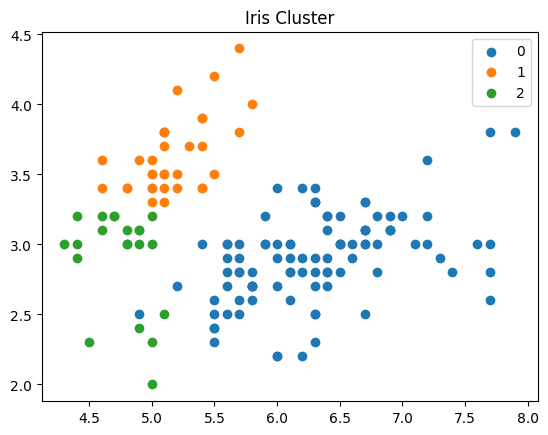

In [14]:
kmeans=KMeans(n_clusters=3,random_state=42)
y= kmeans.fit_predict(x_scaled)
unique_label=np.unique(y)
for i in unique_label:
    plt.scatter(x[y==i,0],x[y==i,1],label=i)
plt.legend()
plt.title("Iris Cluster")
plt.show()

Standardization (or scaling) is done to ensure that all features in the dataset have the same scale, typically with a mean of 0 and a standard deviation of 1. This is important for clustering algorithms like **K-Means** because:

### Reasons for Standardization:

1. **K-Means is Distance-Based**:
   - **K-Means** clustering works by calculating the Euclidean distance between data points and centroids. Features with larger scales will dominate the distance calculation, causing K-Means to give them more weight.
   - For example, in the Iris dataset, if one feature (e.g., petal length) ranges from 1 to 100, while another feature (e.g., sepal width) ranges from 1 to 10, K-Means will treat the feature with the larger range as more important in determining the clusters.
   - Standardization ensures that all features contribute equally by bringing them to the same scale.

2. **Improves Convergence**:
   - K-Means might take longer to converge (or converge to suboptimal clusters) if the feature values are on very different scales. Standardizing the data often speeds up convergence and improves the final cluster quality.

3. **Feature Comparability**:
   - Features measured on different scales might represent different units, but standardization allows the algorithm to treat all features equally. For example, in the Iris dataset, sepal length and sepal width have different units, but standardizing them makes their scales comparable.

4. **General Practice for Algorithms**:
   - Many machine learning algorithms that rely on distance measures (e.g., K-Means, hierarchical clustering, SVM) perform better when features are standardized.

### StandardScaler in the Code:
In the code:
```python
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
```
- **`fit_transform()`** computes the mean and standard deviation for each feature in `x` and then transforms the data by scaling each feature to have a mean of 0 and standard deviation of 1.
- This ensures that the clustering process treats each feature equally, rather than being biased toward features with larger numerical values.

In short, standardization improves the clustering quality by ensuring that all features contribute equally to the distance calculations in algorithms like K-Means.

This code snippet applies the **K-Means clustering algorithm** to the standardized Iris dataset (`x_scaled`) and visualizes the resulting clusters using a 2D scatter plot. Here's a step-by-step breakdown of what each part of the code is doing:

### Code Breakdown:

1. **K-Means Clustering**:
   ```python
   kmeans = KMeans(n_clusters=3, random_state=42)
   y = kmeans.fit_predict(x_scaled)
   ```
   - **`KMeans(n_clusters=3)`**: This initializes the K-Means algorithm with 3 clusters. Since the Iris dataset contains three species (Setosa, Versicolor, and Virginica), it's reasonable to use 3 clusters (`n_clusters=3`).
   - **`random_state=42`**: Ensures that the clustering results are reproducible (i.e., the same random seed will generate the same results every time).
   - **`fit_predict(x_scaled)`**: This method does two things:
     1. **Fits the K-Means model** to the standardized data (`x_scaled`).
     2. **Predicts the cluster labels** for each data point. The result (`y`) is an array where each value indicates the cluster (0, 1, or 2) that a data point has been assigned to.

2. **Extracting Unique Cluster Labels**:
   ```python
   unique_label = np.unique(y)
   ```
   - **`np.unique(y)`**: This function returns the unique cluster labels present in `y`, which in this case will be `[0, 1, 2]`, corresponding to the 3 clusters.

3. **Plotting Clusters**:
   ```python
   for i in unique_label:
       plt.scatter(x[y == i, 0], x[y == i, 1], label=i)
   ```
   - This loop iterates through each cluster label (`i`), plotting the data points that belong to that specific cluster:
     - **`x[y == i, 0]`** selects the data points belonging to cluster `i` and uses their first feature (first column) for the x-axis.
     - **`x[y == i, 1]`** selects the same data points and uses their second feature (second column) for the y-axis.
   - **`plt.scatter()`**: Plots the selected points on a 2D scatter plot. Each cluster is plotted with a different color, and the `label=i` associates the cluster number with the data points for that cluster.
   
4. **Legend and Title**:
   ```python
   plt.legend()
   plt.title("Iris Cluster")
   ```
   - **`plt.legend()`**: Adds a legend to the plot, showing the cluster labels (0, 1, 2) with corresponding colors.
   - **`plt.title("Iris Cluster")`**: Adds a title to the plot.

5. **Display Plot**:
   ```python
   plt.show()
   ```
   - This command displays the scatter plot, visualizing the clusters formed by the K-Means algorithm.

### What the Plot Shows:
- The plot will have three distinct clusters of data points. Each cluster represents one of the groups (species) identified by the K-Means algorithm. However, keep in mind:
  - **Only two features** of the dataset (the first two columns) are being used for this 2D scatter plot.
  - In reality, the Iris dataset has four features, but we’re visualizing only two for simplicity and illustration purposes. 
  - The clusters are labeled as `0`, `1`, and `2`, which may not directly correspond to the original species labels (Setosa, Versicolor, Virginica). However, you can manually match them based on the cluster centroids or the distribution of data points.

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage

The statement:

```python
from scipy.cluster.hierarchy import dendrogram, linkage
```

imports two important functions, **`dendrogram`** and **`linkage`**, from the **`scipy.cluster.hierarchy`** module. These functions are used for **Hierarchical Clustering**. Here's what each function does:

### 1. **`linkage` Function**:
   - The **`linkage`** function is used to perform hierarchical/agglomerative clustering.
   - It calculates the pairwise distances between observations and builds a hierarchical cluster tree.
   - The output is a matrix (called a linkage matrix), which encodes the hierarchical clustering structure. It contains information about which clusters were merged at each step and the distance between the clusters.

   **Parameters**:
   - `X`: The dataset, which is typically a 2D array with rows as observations and columns as features.
   - `method`: The linkage algorithm to use (e.g., 'single', 'complete', 'average', 'ward'). These specify how to calculate the distance between clusters.
   
   **Example**:
   ```python
   Z = linkage(X, method='ward')
   ```
   - This calculates the linkage matrix `Z` using Ward’s method (minimizing the variance of the clusters being merged).

### 2. **`dendrogram` Function**:
   - The **`dendrogram`** function is used to plot the hierarchical clustering as a tree-like diagram (called a dendrogram).
   - The dendrogram shows the order in which clusters were merged and at what distance they were joined. It provides a visual representation of the clustering hierarchy.

   **Parameters**:
   - `Z`: The linkage matrix returned by the `linkage` function.
   - `truncate_mode`, `p`: Additional arguments to control the depth and appearance of the dendrogram.
   
   **Example**:
   ```python
   dendrogram(Z)
   plt.show()
   ```
   - This plots the dendrogram from the linkage matrix `Z`.


### Explanation:
1. **`linkage(X_scaled, method='ward')`**: This performs hierarchical clustering on the standardized data (`X_scaled`), using Ward’s method. The result is stored in `Z`, the linkage matrix.
2. **`dendrogram(Z)`**: This plots the dendrogram based on the hierarchical clustering represented by `Z`.
3. The plot will show how the data points (samples) are grouped into clusters at each level of the hierarchy, and the height of the vertical lines represents the distance at which clusters are merged.

This combination of `linkage` and `dendrogram` is essential for visualizing hierarchical clustering.

In [16]:
#seperate features and class labels
x_features=iris.data
y_label=iris.target


## Model Implimentation of Hirarchical clustering 

In [17]:
model=ag(linkage='ward',n_clusters=3)
model.fit(x_features)
predicted=model.labels_
predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In this code:

```python
model = AgglomerativeClustering(linkage='ward', n_clusters=3)
model.fit(x_features)
predicted = model.labels_
```

- **`AgglomerativeClustering(linkage='ward', n_clusters=3)`**: This initializes the **Agglomerative Clustering** model, specifying that the Ward linkage method should be used, and that the data should be divided into 3 clusters.

  - **Ward Linkage**: It minimizes the variance within clusters when merging them. This is a popular method because it tends to produce clusters of similar size and minimizes the within-cluster variance.
  - **n_clusters=3**: This sets the desired number of clusters to 3, similar to K-Means clustering.

- **`model.fit(x_features)`**: This applies the agglomerative clustering algorithm to the feature matrix `x_features`, which contains your data. The model analyzes the data, clusters it hierarchically, and assigns each data point to one of the 3 clusters.

- **`predicted = model.labels_`**: 
   - After fitting the model, the **`labels_`** attribute of the model contains the cluster labels (0, 1, or 2) assigned to each data point.
   - **`predicted`**: This array will have the same number of entries as your dataset, where each entry corresponds to the cluster that a specific data point belongs to.

### Example Output of `predicted`:
If you have 150 data points in the dataset (e.g., the Iris dataset), the **`predicted`** array will look something like this:

```python
array([0, 0, 1, 2, 1, ..., 2, 1])
```

- Each number (0, 1, or 2) represents the cluster assigned to that particular data point.
  - For example, the first data point is assigned to cluster `0`, the second to cluster `0`, the third to cluster `1`, and so on.

### Interpretation:
- **`predicted`** represents the output of the hierarchical clustering algorithm, where each value in the array corresponds to the cluster index assigned to each data point.
- This can be used to evaluate the performance of clustering or to visualize the clusters using a scatter plot.

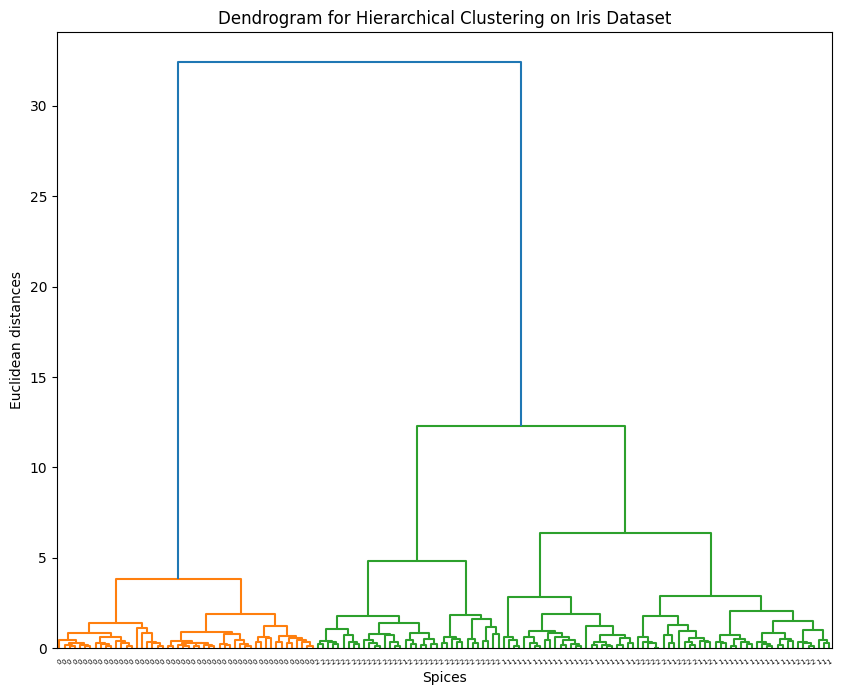

In [18]:
linkage_matrix=linkage(x_features,method='ward')
plt.figure(figsize=(10,8))
dendrogram(linkage_matrix,labels=y_label,leaf_rotation=30)
plt.title("Dendrogram for Hierarchical Clustering on Iris Dataset")
plt.xlabel("Spices")
plt.ylabel('Euclidean distances')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

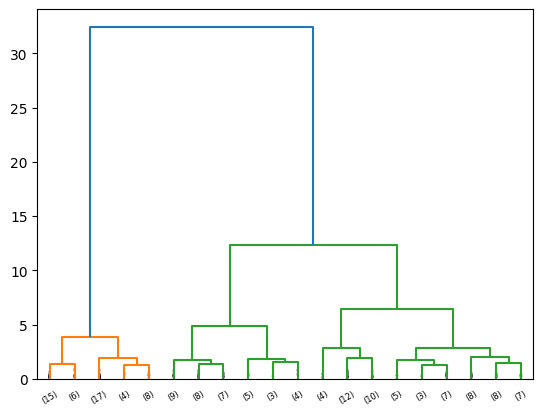

In [19]:
dendrogram(linkage_matrix,truncate_mode='lastp',p=20,leaf_rotation=30,show_contracted=True,leaf_font_size=6)
plt.show

## Cutting the dendogram to form Cluster

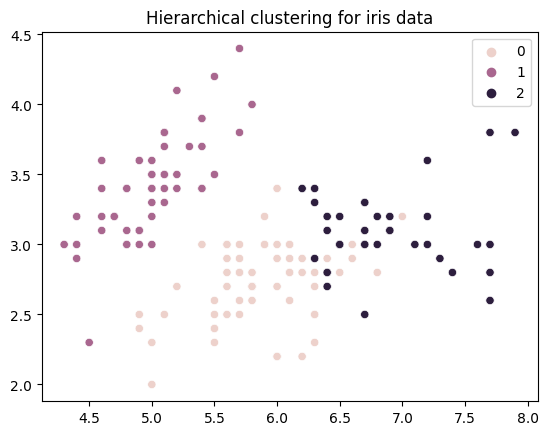

In [20]:
num_cluster=3
hierarchical_model=ag(n_clusters=3)
labels=hierarchical_model.fit_predict(x_features)

sns.scatterplot(x=x_features[:,0],y=x_features[:,1],hue=labels,markers=['s,o,-'])
plt.title('Hierarchical clustering for iris data')
plt.show()

This code performs **hierarchical clustering** using the **Ward linkage method** and visualizes the clustering as a **dendrogram**. Here's a step-by-step breakdown of what each part of the code does:

### 1. **Linkage Matrix**:
   ```python
   linkage_matrix = linkage(x_features, method='ward')
   ```
   - **`linkage(x_features, method='ward')`**: 
     - This performs hierarchical clustering on the dataset (`x_features`) using **Ward's method**.
     - **Ward's method** minimizes the variance between clusters when merging them, leading to compact, evenly sized clusters.
     - The result is a **linkage matrix**, which contains the hierarchical clustering information (e.g., which clusters are merged at each step and the distance between them).
   
### 2. **Creating the Dendrogram**:
   ```python
   plt.figure(figsize=(10,8))
   dendrogram(linkage_matrix, labels=y_label, leaf_rotation=30)
   ```
   - **`plt.figure(figsize=(10,8))`**: 
     - This creates a new figure with dimensions of 10 units wide and 8 units high. It gives the plot a larger and clearer view.
   - **`dendrogram(linkage_matrix, labels=y_label, leaf_rotation=30)`**:
     - **`linkage_matrix`**: This is the output of the `linkage` function, representing the hierarchical clustering structure.
     - **`labels=y_label`**: These labels are passed to display the actual names or labels of the data points at the leaves of the dendrogram (in this case, species labels from the Iris dataset like Setosa, Versicolor, and Virginica).
     - **`leaf_rotation=30`**: Rotates the labels on the x-axis (leaf nodes) by 30 degrees for better readability. This ensures the species names or labels aren't overlapping and can be easily read.

### 3. **Adding Titles and Labels**:
   ```python
   plt.title("Dendrogram for Hierarchical Clustering on Iris Dataset")
   plt.xlabel("Species")
   plt.ylabel('Euclidean distances')
   ```
   - **`plt.title("Dendrogram for Hierarchical Clustering on Iris Dataset")`**: Sets the title for the dendrogram plot, indicating what the plot is about.
   - **`plt.xlabel("Species")`**: Labels the x-axis as "Species," since the leaf nodes correspond to individual Iris species.
   - **`plt.ylabel('Euclidean distances')`**: Labels the y-axis as "Euclidean distances," since the vertical height in the dendrogram represents the distance (or dissimilarity) between clusters at each merging step.

### 4. **Display the Plot**:
   ```python
   plt.show()
   ```
   - This displays the dendrogram plot.

---

### **Understanding the Dendrogram**:
- **Dendrogram**:
   - A **dendrogram** is a tree-like diagram that shows the hierarchical relationships between data points or clusters. Each merge (or "joining") in the tree represents a step in the hierarchical clustering process, where two clusters are joined together based on their similarity/distance.
   - The **height** of the vertical lines (the branches) represents the **Euclidean distance** between the clusters at the time they were merged. Larger distances indicate that the clusters being merged were more dissimilar.

- **Leaf Nodes**:
   - The **leaf nodes** (at the bottom of the dendrogram) represent individual data points (in this case, individual species from the Iris dataset).

- **Horizontal Cuts**:
   - If you were to "cut" the dendrogram horizontally at any given height, it would show you the clusters formed at that level. For example, cutting the dendrogram at a certain height might result in 3 distinct clusters, which could correspond to the 3 species of the Iris dataset.

### **Conclusion**:
The dendrogram helps visualize how the data points (Iris species) are grouped into clusters, showing the hierarchy of these clusters and the distances between them. In this case, it's useful for understanding the structure of the Iris dataset and how the species are related based on their features.